# Verificando y actualizando el entorno en Kaggle

Este código verifica la conectividad a Internet en Kaggle utilizando un intento de conexión a la dirección IP '1.1.1.1' en el puerto 53. Si la conexión falla, se genera una excepción indicando la falta de conexión a Internet. El comentario proporciona información adicional sobre la verificación telefónica necesaria en Kaggle.

In [1]:
# Nota: Kaggle requiere verificación telefónica para utilizar Internet o una GPU. Si aún no has realizado esto, la celda a continuación fallará.
#       Este código está aquí solo para comprobar si tu conexión a Internet está habilitada. No realiza ninguna otra acción.
#       Aquí hay un hilo de ayuda sobre cómo verificar tu número de teléfono: https://www.kaggle.com/product-feedback/135367

import socket
import warnings

try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex:
    raise Exception("DETENER: Sin conexión a Internet. Haz clic en '>|' en la esquina superior derecha y activa el interruptor 'Internet'")


Este código verifica si se está ejecutando en Kaggle y, en caso afirmativo, utiliza pip para actualizar las bibliotecas `fastai` y `duckduckgo_search` a sus últimas versiones. El comentario proporciona información adicional sobre la importancia de asegurarse de tener las últimas versiones de las bibliotecas necesarias. Además, se advierte que se pueden ignorar de manera segura las advertencias o errores que pueda generar pip.

In [2]:
# Es una buena idea asegurarse de que estás ejecutando la última versión de cualquier biblioteca que necesites.
# `!pip install -Uqq <bibliotecas>` actualiza a la última versión de <bibliotecas>
# NB: Puedes ignorar de manera segura cualquier advertencia o error que pip arroje sobre ejecutarse como root o incompatibilidades.
import os

# Verifica si el entorno de ejecución es Kaggle
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# Si se está ejecutando en Kaggle, actualiza las bibliotecas especificadas
if iskaggle:
    !pip install -Uqq fastai duckduckgo_search


# OBJETIVOS

Veremos cómo podemos `crear un modelo` muy `sencillo` y `explicado a detalle` para poder empezar a identificar imágenes con inteligencia artificial en solo unos minutos, utilizando recursos `completamente gratuitos`.

1. Utilizar DuckDuckGo para buscar imágenes de "cilantro y perejil".
2. Ajustar finamente una red neuronal preentrenada para reconocer estos dos grupos.
3. Intentar ejecutar este modelo en una imagen de un cilantro y ver si funciona.

## PASO 1: Preparando el entorno

In [3]:
!pip install fastbook > /dev/null 2>&1;


El código `!pip install fastbook` se utiliza para instalar la biblioteca Fastbook. Fastbook es parte del curso "Practical Deep Learning for Coders" de [fast.ai](http://fast.ai). Esta biblioteca proporciona herramientas y utilidades específicas para facilitar el aprendizaje y la implementación práctica de técnicas de aprendizaje profundo.

In [4]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

Este fragmento de código utiliza la biblioteca `fastbook` y `fastai` para realizar una búsqueda de imágenes en DuckDuckGo. Aquí hay una breve explicación del código:

1.  `from fastbook import *`: Importa todo el contenido del módulo `fastbook`. Esto incluye funciones y utilidades específicas del curso de [fast.ai](http://fast.ai).
    
2.  `from fastai.vision.widgets import *`: Importa funciones y clases relacionadas con widgets visuales en el contexto de [fast.ai](http://fast.ai). Esto puede incluir herramientas para visualización de imágenes, gráficos, etc.
    
3.  La función `search_images(term, max_images=30)` realiza una búsqueda de imágenes en DuckDuckGo utilizando el término proporcionado (`term`). La función devuelve una lista de URLs de imágenes. El parámetro `max_images` controla el número máximo de imágenes que se deben recuperar (por defecto, se establece en 30).
    
4.  `print(f"Searching for '{term}'")`: Imprime un mensaje indicando la búsqueda que se está realizando.
    
5.  `return L(search_images_ddg(term, max_images=max_images))`: Utiliza la función `search_images_ddg` para realizar la búsqueda y luego envuelve los resultados en un objeto de tipo `L` (una lista extendida, parte de la biblioteca `fastcore` que está integrada en `fastai`). Este objeto `L` esencialmente extiende la funcionalidad de una lista estándar de Python con algunas funciones adicionales.
    

En resumen, este código proporciona una función simple para realizar búsquedas de imágenes en DuckDuckGo dada una palabra clave (`term`). Ten en cuenta que esta función depende de la biblioteca `fastbook` y `fastai`, por lo que necesitarás tener esas bibliotecas instaladas en tu entorno de Python para ejecutar con éxito este código. Además, asegúrate de tener acceso a Internet para realizar la búsqueda de imágenes en línea.

## PASO 2: Buscando las imagenes

In [5]:
# Este fragmento de código realiza una búsqueda de imágenes en línea utilizando la función search_images
# para encontrar una imagen de "perejil fresco". Se especifica que se desea obtener un máximo de 1 imagen.
# La URL de la primera imagen encontrada se almacena en la variable `urls[0]`.

urls = search_images('perejil fresco', max_images=1)
urls[0]

Searching for 'perejil fresco'


'https://album.mediaset.es/eimg/10000/2020/08/09/clipping_eWgFuY_7f39.jpg?w=1024'

Este fragmento de código busca una imagen de "perejil fresco" en [duckduckgo.com](http://duckduckgo.com) y almacena la URL de la primera imagen encontrada en la variable `urls`. Este proceso puede requerir intentos múltiples debido a posibles problemas con la respuesta JSON de [duckduckgo.com](http://duckduckgo.com), como se indica en el comentario.

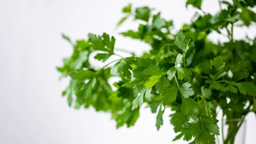

In [6]:
# Este fragmento de código utiliza la función download_url del módulo fastdownload para descargar la imagen desde la URL almacenada en la variable `urls[0]`.
# La imagen descargada se guarda en la ubicación especificada por la variable `dest` ('perejil.jpg').
# El parámetro show_progress=False se utiliza para desactivar la visualización del progreso durante la descarga.

from fastdownload import download_url
dest = 'perejil.jpg'
download_url(urls[0], dest, show_progress=False)

# A continuación, se utiliza la biblioteca fastai.vision para abrir la imagen descargada mediante la función Image.open.
# La imagen se almacena en la variable `im`.
from fastai.vision.all import *
im = Image.open(dest)

# Finalmente, se utiliza el método to_thumb(256, 256) para reducir la imagen a una miniatura de 256x256 píxeles.
im.to_thumb(256, 256)


Este fragmento de código descarga una imagen de la URL previamente obtenida, la abre y la transforma en una miniatura de 256x256 píxeles. Es probable que se utilice para preprocesar imágenes antes de aplicar algoritmos de visión por computadora.

In [7]:
# Este fragmento de código realiza una búsqueda de imágenes en línea utilizando la función search_images
# para encontrar una imagen de "cilantro fresco". Se especifica que se desea obtener un máximo de 1 imagen.
# La URL de la primera imagen encontrada se almacena en la variable `urls[0]`.

urls = search_images('cilantro fresco', max_images=1)
urls[0]


Searching for 'cilantro fresco'


'https://www.atablefullofjoy.com/wp-content/uploads/2021/07/how-to-cut-cilantro-11-1200x800.jpg'

Igual que el anterior este código busca y almacena la URL de la primera imagen encontrada de "cilantro fresco" utilizando la función `search_images`. La variable `urls[0]` contiene la URL de la imagen resultante.

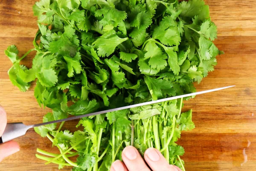

In [8]:
# Este fragmento de código utiliza la función download_url del módulo fastdownload para descargar la imagen desde la URL almacenada en la variable `urls[0]`.
# La imagen descargada se guarda en la ubicación especificada por la variable `dest` ('cilantro.jpg').
# El parámetro show_progress=False se utiliza para desactivar la visualización del progreso durante la descarga.

from fastdownload import download_url
dest = 'cilantro.jpg'
download_url(urls[0], dest, show_progress=False)

# A continuación, se utiliza la biblioteca fastai.vision para abrir la imagen descargada mediante la función Image.open.
# La imagen se almacena en la variable `im`.
from fastai.vision.all import *
im = Image.open(dest)

# Finalmente, se utiliza el método to_thumb(256, 256) para reducir la imagen a una miniatura de 256x256 píxeles.
im.to_thumb(256, 256)


Este código descarga una imagen de cilantro fresco desde la URL almacenada en `urls[0]`, la abre y la transforma en una miniatura de 256x256 píxeles. Es un proceso similar al fragmento de código anterior, adaptado para la búsqueda y manipulación de imágenes específicas.

In [9]:
# Este fragmento de código realiza búsquedas de imágenes para las categorías 'cilantro fresco' y 'perejil fresco'.
# Utiliza la biblioteca fastai.vision y funciones relacionadas para descargar y organizar imágenes de distintas partes de la planta.

from time import sleep
from fastai.vision.all import *

# Definición de las categorías de búsqueda
searches = 'cilantro fresco', 'perejil fresco'

# Especificación del directorio de destino para las imágenes descargadas
path = Path('cilantro_o_no')

# Bucle de iteración sobre las categorías de búsqueda
for o in searches:
    dest = (path/o)
    
    # Creación del directorio de destino, si no existe
    dest.mkdir(exist_ok=True, parents=True)
    
    # Descarga de imágenes de la planta
    download_images(dest, urls=search_images(f'{o} planta'))
    sleep(10)  # Pausa entre búsquedas para evitar sobrecargar el servidor
    
    # Descarga de imágenes de la hoja
    download_images(dest, urls=search_images(f'{o} hoja'))
    sleep(10)
    
    # Descarga de imágenes del manojo
    download_images(dest, urls=search_images(f'{o} manojo'))
    sleep(10)
    
    # Redimensionamiento de las imágenes descargadas a un tamaño máximo de 400 píxeles
    resize_images(path/o, max_size=400, dest=path/o)


Searching for 'cilantro fresco planta'
Searching for 'cilantro fresco hoja'
Searching for 'cilantro fresco manojo'
Searching for 'perejil fresco planta'
Searching for 'perejil fresco hoja'
Searching for 'perejil fresco manojo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Este código realiza búsquedas de imágenes para 'cilantro fresco' y 'perejil fresco', descarga imágenes de distintas partes de la planta, y las organiza en carpetas según la categoría de búsqueda. Además, se realiza un redimensionamiento de las imágenes descargadas para limitar su tamaño a un máximo de 400 píxeles. La pausa entre búsquedas (con `sleep(10)`) ayuda a evitar la sobrecarga del servidor.

In [10]:
# Verifica las imágenes en el directorio especificado
failed = verify_images(get_image_files(path))

# Elimina las imágenes fallidas
failed.map(Path.unlink)

# Imprime la cantidad de imágenes fallidas
len(failed)


12

Este código ayuda a limpiar un conjunto de datos de imágenes eliminando aquellas que están dañadas o no se pueden abrir, mejorando así la calidad y la integridad de los datos antes de utilizarlos en un modelo o análisis. ¡Buena práctica para mantener las cosas en orden!

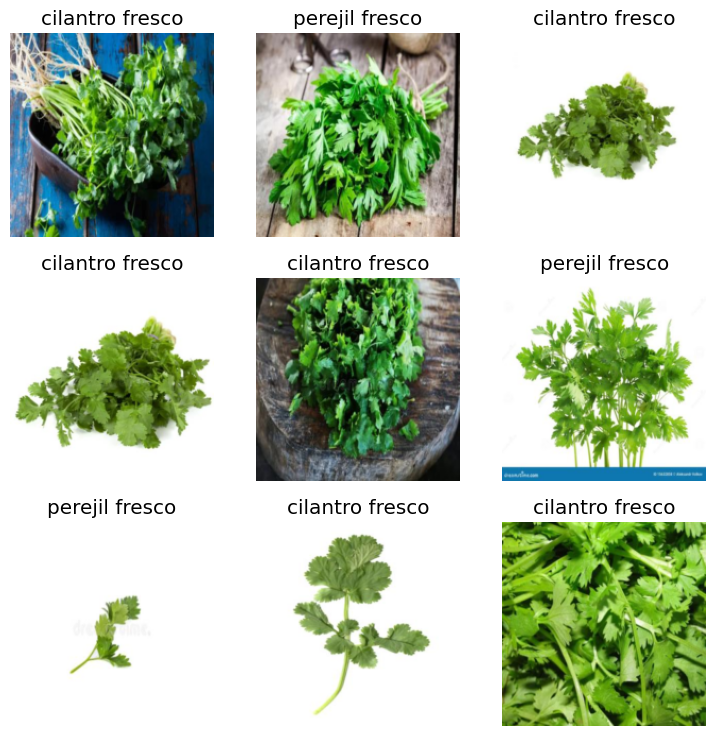

In [11]:
# Definimos un bloque de datos (DataBlock) para procesar las imágenes
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Definimos bloques para las imágenes y las categorías
    get_items=get_image_files,  # Obtenemos la lista de archivos de imágenes
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Dividimos aleatoriamente el conjunto de datos en entrenamiento y validación
    get_y=parent_label,  # Obtenemos las etiquetas de las carpetas padre (suponiendo estructura de carpetas)
    item_tfms=[Resize(192, method='squish')]  # Aplicamos transformaciones a las imágenes (en este caso, redimensionamiento)
).dataloaders(path, bs=32)  # Creamos los dataloaders con el conjunto de datos en la ruta especificada y un tamaño de lote de 32

# Mostramos un lote de datos de los dataloaders
dls.show_batch(max_n=9)


1.  `DataBlock`: Se utiliza para definir cómo se deben procesar los datos. En este caso, se especifican bloques para las imágenes (`ImageBlock`) y las categorías (`CategoryBlock`).
    
2.  `get_image_files`: Esta función se encarga de obtener la lista de archivos de imágenes en la ruta especificada.
    
3.  `RandomSplitter`: Divide aleatoriamente el conjunto de datos en conjuntos de entrenamiento y validación. En este caso, el 20% se asigna al conjunto de validación, y se fija la semilla para reproducibilidad.
    
4.  `parent_label`: Esta función se utiliza para obtener las etiquetas de las carpetas padre, asumiendo una estructura de carpetas que contiene subcarpetas para cada categoría.
    
5.  `item_tfms`: Se aplican transformaciones a las imágenes. En este caso, se redimensionan a 192 píxeles, utilizando el método 'squish' para ajustar la relación de aspecto.
    
6.  `dataloaders`: Crea los dataloaders utilizando la configuración definida en el DataBlock y carga los datos desde la ruta especificada con un tamaño de lote de 32.
    
7.  `show_batch(max_n=9)`: Muestra un lote de datos (imágenes y etiquetas) del conjunto de entrenamiento. En este caso, se muestran como máximo 9 ejemplos.

In [12]:
# Crear un objeto vision_learner
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Ajustar finamente (fine-tune) el modelo durante 3 épocas
learn.fine_tune(3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.388454,0.850699,0.437500,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.670911,0.646712,0.343750,00:14
1,0.479108,0.466215,0.281250,00:14
2,0.365846,0.474418,0.187500,00:14


1.  `vision_learner`: Esta función crea un objeto de aprendizaje para tareas de visión utilizando una arquitectura específica, en este caso, ResNet-18. Los parámetros proporcionados incluyen el conjunto de datos (`dls`), la arquitectura del modelo (`resnet18`), y las métricas a seguir durante el entrenamiento (`error_rate` en este caso).
    
2.  `fine_tune(3)`: Este método se utiliza para ajustar finamente el modelo preentrenado en el conjunto de datos proporcionado. El argumento `3` indica que se realizarán 3 épocas de ajuste fino.
    

En resumen, este código carga un modelo de visión preentrenado (ResNet-18), lo adapta al conjunto de datos proporcionado (`dls`) y lo entrena durante 3 épocas para afinar los pesos del modelo según los datos específicos de la tarea en cuestión. La métrica `error_rate` se utiliza para evaluar el rendimiento del modelo durante el entrenamiento.

In [13]:
si_es,_,probs = learn.predict(PILImage.create('cilantro.jpg'))
print(f"¿Esto es cilantro?: {si_es} papu!.")
print(f"Puede haber un error de {probs[0]:.4f}% que no sea.")

¿Esto es cilantro?: cilantro fresco papu!.
Puede haber un error de 0.5308% que no sea.
